In [1]:
import pandas as pd
import pickle
import os
from os import walk
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
from gprofiler import GProfiler
from Bio.Seq import Seq

# Figure 1A

In [2]:
#Load predictions from pickle files
output=[]
predictions =[]
for z in os.listdir('SI Data 1/predictions_S288C/'):
    if z == '.DS_Store':
        continue

    infile = open('SI Data 1/predictions_S288C/'+z,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    for x in new_dict:
        count = 0
        for y in x[2]:
            predictions.append([x[0],y,x[1][count],count])
            count+=1



In [3]:
df_y = pd.DataFrame(predictions,columns=['Locus','Predicted_activation','Z-score','position'])

In [6]:
df_TF = pd.read_excel('Tables/yeast_TF_list_extended.xlsx')
TF_list = list(dict.fromkeys(df_TF.Locus.to_list()))

In [10]:
df_nonTF = df_y[~df_y['Locus'].isin(TF_list)]
df_subTF = df_y[df_y['Locus'].isin(TF_list)]

<Axes: xlabel='Predicted_activation', ylabel='Count'>

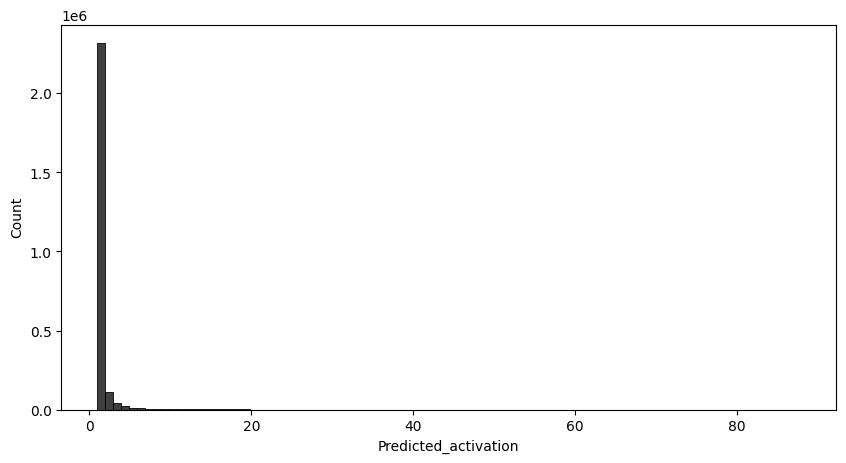

In [46]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_nonTF, x = 'Predicted_activation',binwidth=1,color='black')
#plt.savefig('Figure 1 A part1.pdf')

(16.0, 120.0)

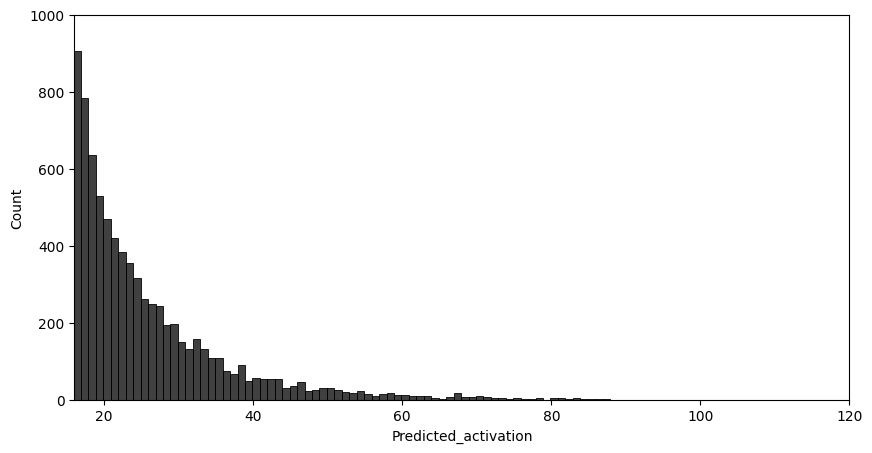

In [48]:
# Supplementary Figure 1B, inlet
plt.figure(figsize=(10,5))
sns.histplot(df_nonTF, x = 'Predicted_activation',binwidth=1,color='black')
plt.ylim(-0.1,1000)
plt.xlim(16,120)
#plt.savefig('Figure 1 A_part2.pdf')

<Axes: xlabel='Predicted_activation', ylabel='Count'>

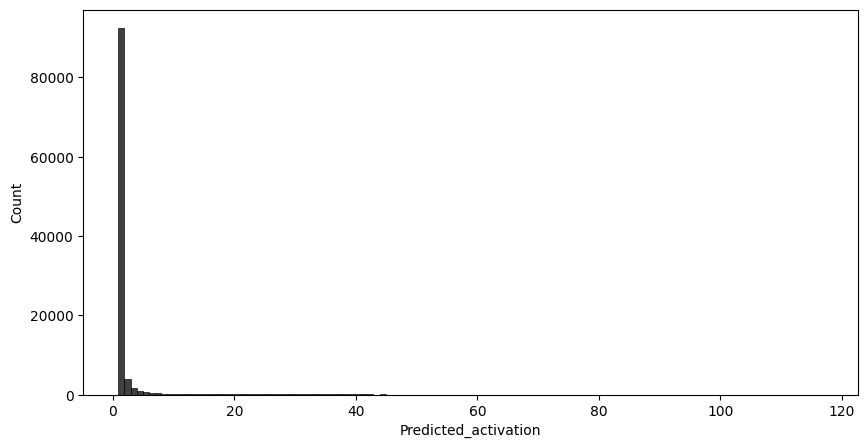

In [16]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_subTF, x = 'Predicted_activation',binwidth=1,color='black')
#plt.savefig('Figure SI B_part1.pdf')

(16.0, 120.0)

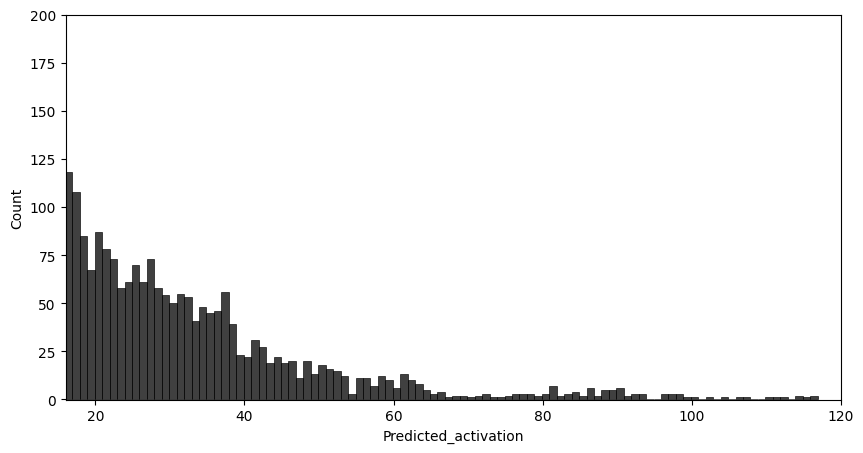

In [17]:
# Supplementary Figure 1B, inlet
plt.figure(figsize=(10,5))
sns.histplot(df_subTF, x = 'Predicted_activation',binwidth=1,color='black')
plt.ylim(-0.1,200)
plt.xlim(16,120)
#plt.savefig('Figure SI B_part2.pdf')

# Figure 1B

In [18]:
# Activation score centered
output=[]
predictions =[]
for z in os.listdir('SI Data 1/A_thaliana/'):
    if z == '.DS_Store':
        continue

    infile = open('SI Data 1/A_thaliana/'+z,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    for x in new_dict:
        count = 0
        for y in x[2]:
            predictions.append([x[0],y,x[1][count],count])
            count+=1

In [19]:
# At this stage the dataframe contains all PADDLE predictions for all gene models of the respective locus
df_AT = pd.DataFrame(predictions,columns=['Locus','Predicted_activation','Z-score','position'])

In [20]:
# This dataframe contains the representative Gene model name as received from TAIR
df_rep = pd.read_excel('SI Data 1/AT_Non_TF_representative_GeneID.xlsx')

In [21]:
# Generate new dataframe that only contains PADDLE predictions from representative gene model
df_AT1 = df_AT[df_AT.Locus.isin(df_rep['Gene Model Name'].to_list())]

In [34]:
AT_TF = pd.read_csv('SI Data 1/AT_TF_list.csv')

In [42]:
df_AT_TF = df_AT[df_AT.Locus.isin(AT_TF.TF_ID.to_list())]

<Axes: xlabel='Predicted_activation', ylabel='Count'>

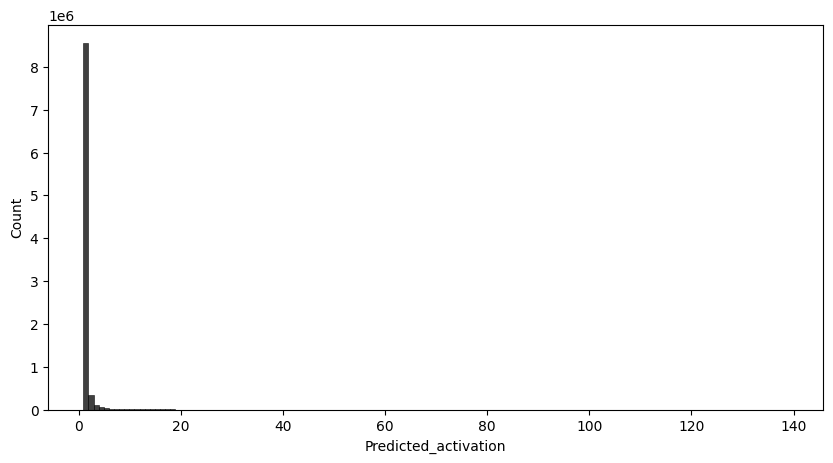

In [38]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_AT_nonTF, x = 'Predicted_activation',binwidth=1,color='black')
#plt.savefig('Figure B_part1.pdf')

(16.0, 120.0)

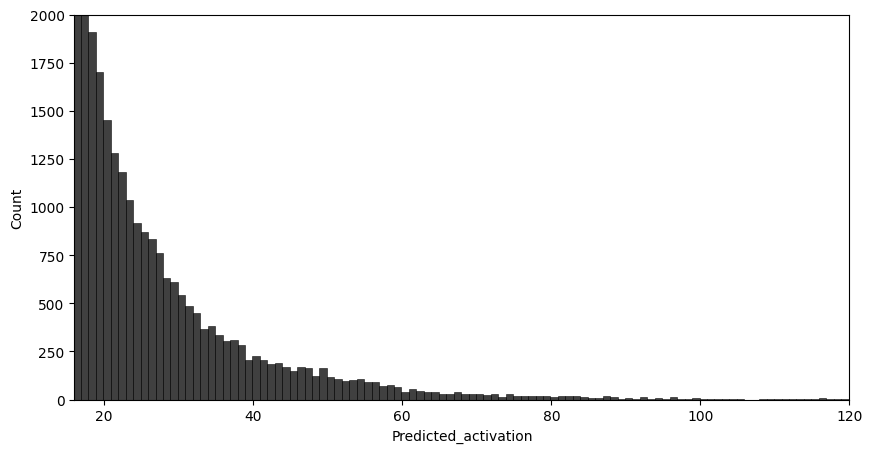

In [39]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_AT_nonTF, x = 'Predicted_activation',binwidth=1,color='black')
plt.ylim(-0.1,2000)
plt.xlim(16,120)
#plt.savefig('Figure B_part2.pdf')

<Axes: xlabel='Predicted_activation', ylabel='Count'>

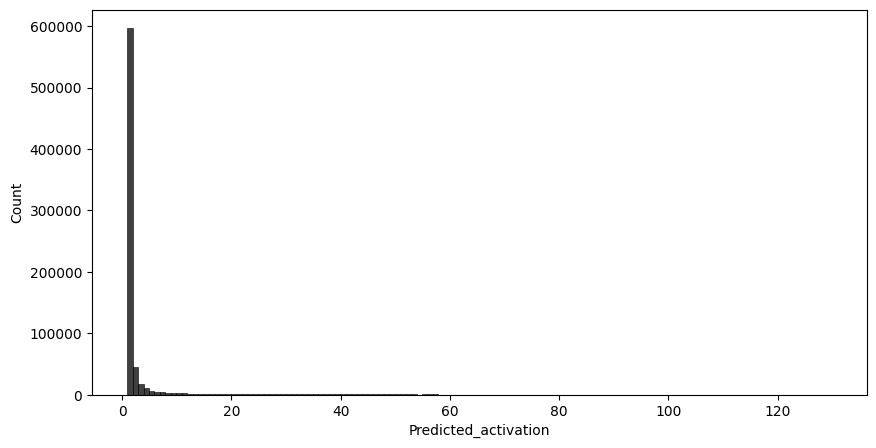

In [44]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_AT_TF, x = 'Predicted_activation',binwidth=1,color='black')
#plt.savefig('Figure B_part1.pdf')

(16.0, 120.0)

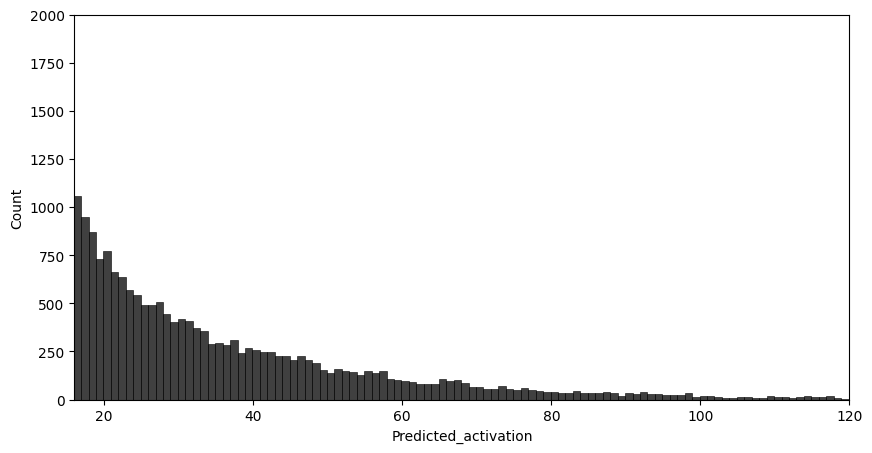

In [45]:
# Supplementary Figure 1B
plt.figure(figsize=(10,5))
sns.histplot(df_AT_TF, x = 'Predicted_activation',binwidth=1,color='black')
plt.ylim(-0.1,2000)
plt.xlim(16,120)
#plt.savefig('Figure B_part2.pdf')